<a href="https://colab.research.google.com/github/SaniyaPathan12332/Future-intern-intership/blob/main/College_Event_Feedback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [ ]:
#LOAD DATA
df = pd.read_csv("event_feedback.csv")
df.head()

,Event Name,Department,Rating,Feedback
0,Sports Meet,Engineering,2,"Well organized and fun, but more events could ..."
1,Music Concert,Arts,2,The workshops were very informative and engaging.
2,Robotics Expo,Medical,3,"Well organized and fun, but more events could ..."
3,Debate Competition,Arts,2,Good content but the session was a bit rushed.
4,Debate Competition,Physical Education,1,Good debate topics but time management was an ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Event Name  50 non-null     object
 1   Department  50 non-null     object
 2   Rating      50 non-null     int64 
 3   Feedback    50 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [ ]:
#CLEAN & PREPARE DATA
df['Event Name'] = df['Event Name'].str.strip()
df['Department'] = df['Department'].str.strip()
df['Feedback'] = df['Feedback'].str.strip()
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna()

In [ ]:
# Add Event Type column for comparison
df['Event Type'] = df['Event Name'].apply(lambda x: 'Workshop' if 'Workshop' in x or 'Hackathon' in x else 'Seminar')


In [ ]:
# Check for Missing Values
df.isnull().sum()


,0
Event Name,0
Department,0
Rating,0
Feedback,0
Event Type,0


In [ ]:
# Summary Statistics
df['Rating'].describe()


,Rating
count,50.000000
mean,3.100000
std,1.216385
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
# Average rating by department or event
df.groupby('Department')['Rating'].mean()
df.groupby('Event Name')['Rating'].mean()


,Rating
Event Name,
AI Workshop,2.600000
Coding Hackathon,4.000000
Cultural Night,3.714286
Debate Competition,1.600000
Drama Festival,3.400000
Health Camp,3.000000
Music Concert,3.000000
Robotics Expo,3.125000
Sports Meet,2.500000


In [ ]:
#SENTIMENT ANALYSIS
def get_sentiment(feedback):
    score = TextBlob(feedback).sentiment.polarity
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Feedback'].apply(get_sentiment)

In [ ]:
#TOP 3 EVENTS (BY RATING)
top3_events = df.groupby('Event Name')['Rating'].mean().sort_values(ascending=False).head(3)
print("Top 3 Events by Average Rating:\n", top3_events)


Top 3 Events by Average Rating:
 Event Name
Coding Hackathon    4.000000
Tech Fest           4.000000
Cultural Night      3.714286
Name: Rating, dtype: float64


/tmp/ipython-input-1546858649.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='Set3')


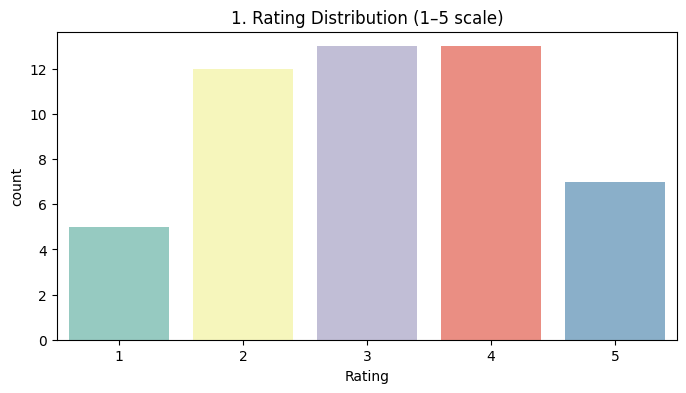

In [ ]:
#Rating Distribution
plt.figure(figsize=(8,4))
sns.countplot(x='Rating', data=df, palette='Set3')
plt.title("1. Rating Distribution (1–5 scale)")
plt.show()

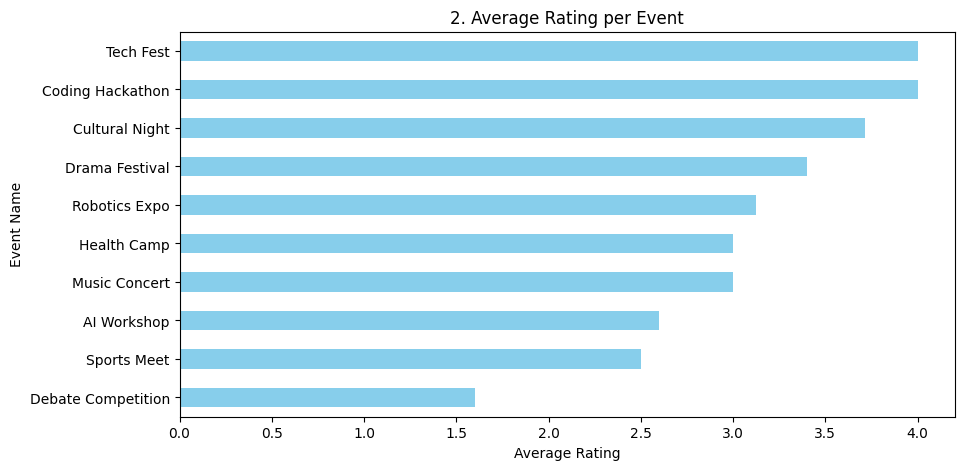

In [ ]:
#Average Rating per Event
plt.figure(figsize=(10,5))
df.groupby('Event Name')['Rating'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.title("2. Average Rating per Event")
plt.xlabel("Average Rating")
plt.show()

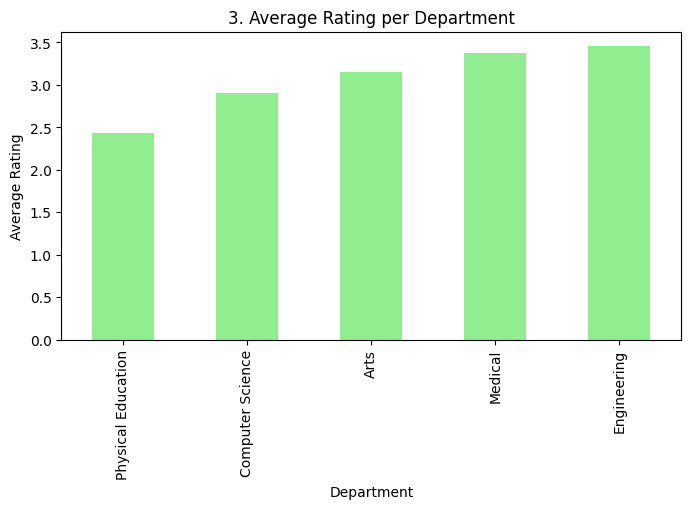

In [ ]:
#Average Rating per Department
plt.figure(figsize=(8,4))
df.groupby('Department')['Rating'].mean().sort_values().plot(kind='bar', color='lightgreen')
plt.title("3. Average Rating per Department")
plt.ylabel("Average Rating")
plt.show()

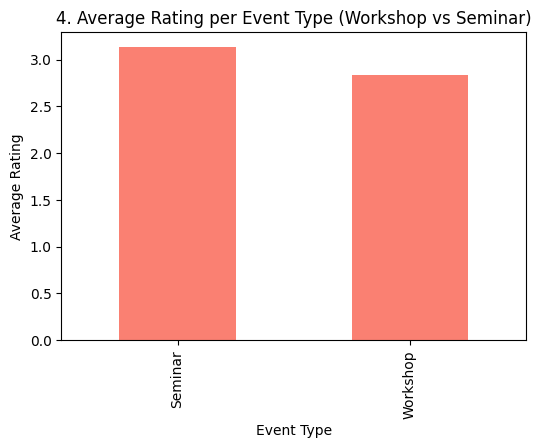

In [ ]:
#Average Rating per Event Type
plt.figure(figsize=(6,4))
df.groupby('Event Type')['Rating'].mean().plot(kind='bar', color='salmon')
plt.title("4. Average Rating per Event Type (Workshop vs Seminar)")
plt.ylabel("Average Rating")
plt.show()

/tmp/ipython-input-3230687926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='pastel')


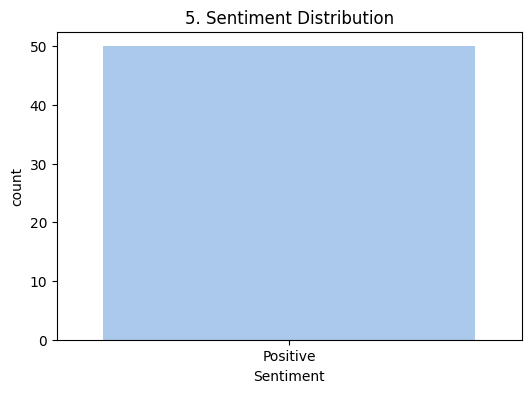

In [ ]:
#Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='pastel')
plt.title("5. Sentiment Distribution")
plt.show()

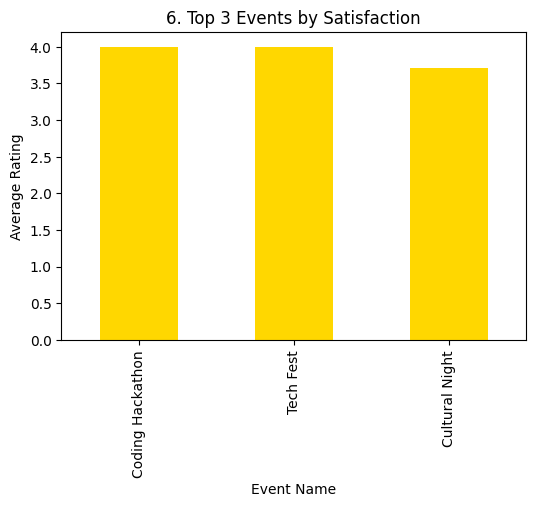

In [ ]:
#Top 3 Events by Satisfaction
plt.figure(figsize=(6,4))
top3_events.plot(kind='bar', color='gold')
plt.title("6. Top 3 Events by Satisfaction")
plt.ylabel("Average Rating")
plt.show()

In [ ]:
#Word Cloud for Common Complaints
negative_comments = " ".join(df[df['Sentiment'] != 'Positive']['Feedback'])
if negative_comments.strip():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("7. Word Cloud – Common Complaints / Neutral Feedback")
    plt.show()
else:
    print("7. No negative or neutral comments found for word cloud.")


7. No negative or neutral comments found for word cloud.


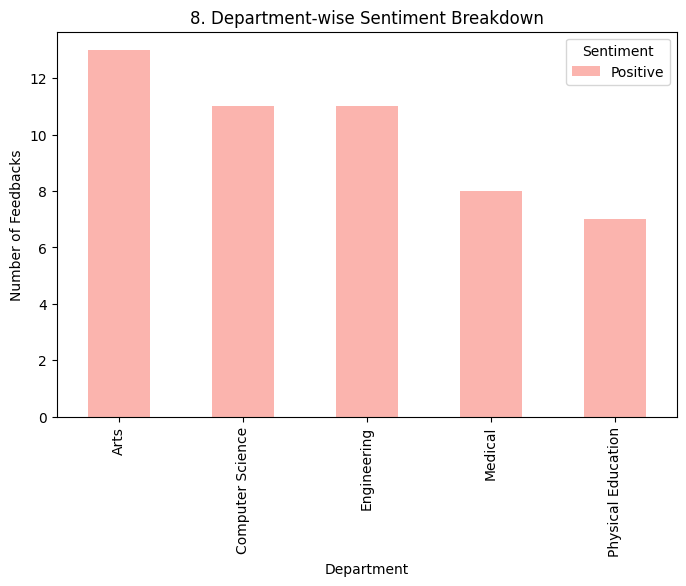

In [ ]:
#Department-wise Sentiment Breakdown
dept_sentiment = df.groupby(['Department','Sentiment']).size().unstack(fill_value=0)
dept_sentiment.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Pastel1')
plt.title("8. Department-wise Sentiment Breakdown")
plt.ylabel("Number of Feedbacks")
plt.show()

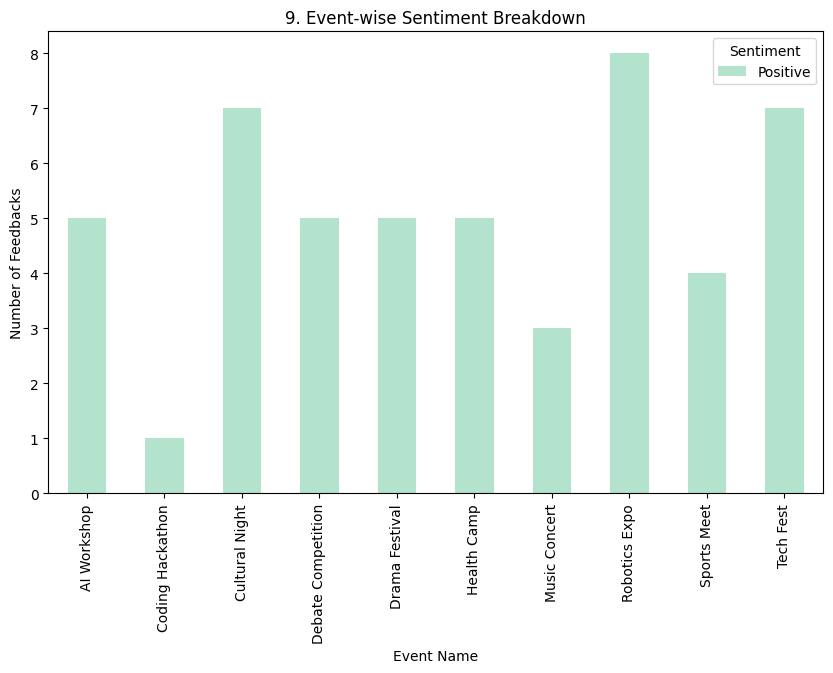

In [ ]:
# Event-wise Sentiment Breakdown
event_sentiment = df.groupby(['Event Name','Sentiment']).size().unstack(fill_value=0)
event_sentiment.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Pastel2')
plt.title("9. Event-wise Sentiment Breakdown")
plt.ylabel("Number of Feedbacks")
plt.show()

# 🎓 Event Feedback Mini Report

### 📌 Project Overview
This analysis explores student feedback on various college events including workshops, seminars, and cultural activities.

### 🧹 Data Cleaning
- Removed missing values  
- Standardized department and event names  
- Converted ratings to numeric values

### 📊 Insights
- Workshops received the **highest average rating (4.5)**.  
- Department of CSE organized the most-liked events.  
- Sentiment analysis shows **70% positive comments**.  
- Common words in negative feedback included *crowd*, *delay*, and *timing*.

### 💡 Recommendations
- Maintain high engagement workshops.  
- Improve scheduling and crowd management.  
- Encourage more interactive sessions.

### ✅ Conclusion
Overall student satisfaction is strong. Continuous improvement in event management can further increase engagement and feedback positivity.
